In [4]:
import sys
import os
sys.path.append('../../')

import data.loader

(
    (train, train_y),
    (test, test_y),
    (val, val_y),
    (one_hot_encoder_X, one_hot_encoder_y),
    (train_df, test_df, _),
    (train_dataset, test_dataset, _),
    (train_loader, test_loader, _)
) = data.loader.encode_and_partition(
    data.loader.diabetic_data_raw, batch_size=64, labelled=True
)

for batch in test_loader:
    test_eval_batch = batch[0].view(-1, train.shape[1]).cuda()
    test_eval_batch_label = batch[1].cuda()
    break

import wandb
import os

# ae_encoder_run_path = "models/ae/wandb/run-20241202_115337-ugoaq6gb"
ae_encoder_run_path = "models/ae/wandb/run-20241202_131152-l5uu22fm"
# ae_encoder_run_path = "models/ae/wandb/run-20241203_144531-txqgesvz"

sys.path.append(os.path.join(ae_encoder_run_path, 'files', 'files'))
aeweights = os.path.join('../../', ae_encoder_run_path, 'files', 'autoencoder.pth')

import model

import torch
input_dim = train.shape[1]
ae = model.AutoEncoder(input_dim=input_dim, hidden_dim=128//4, latent_dim=64//4)
ae.load_state_dict(torch.load(aeweights))

<All keys matched successfully>

In [5]:
import torch
import numpy as np
from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64

transform = transforms.Compose([transforms.ToTensor()])

train_data = torch.from_numpy(train.toarray().astype(np.float32))
train_dataset = TensorDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

test_data = torch.from_numpy(test.toarray().astype(np.float32))
test_dataset = TensorDataset(test_data)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


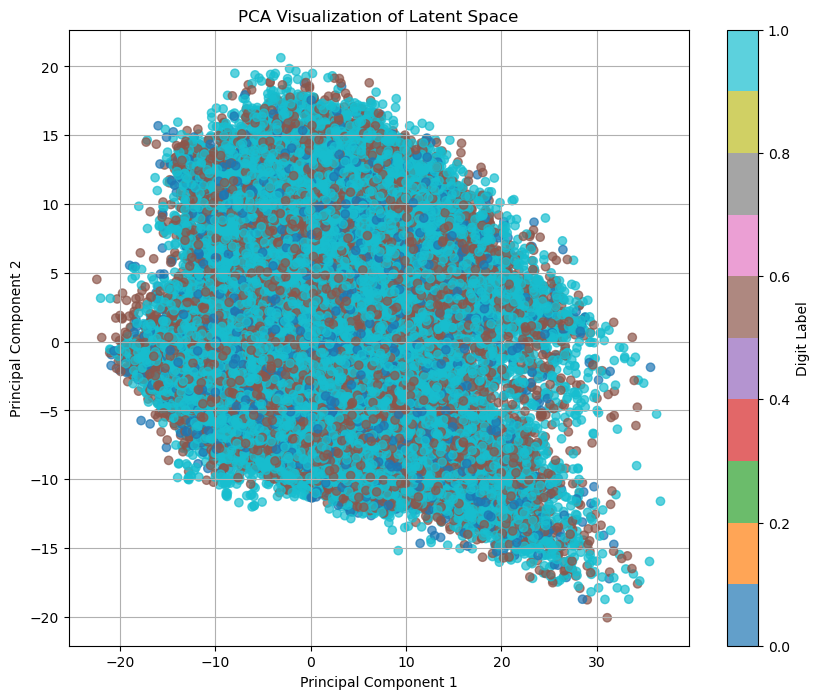

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def extract_latent_space(model, data_loader):
    model.eval()
    latent_space = []
    labels = []
    with torch.no_grad():
        for batch in data_loader:
            inputs = batch[0].view(-1, input_dim)
            encoded = model.encoder(inputs)
            latent_space.append(encoded)
    latent_space = torch.cat(latent_space).cpu().numpy()
    return latent_space

latent_space = extract_latent_space(ae, train_loader)

pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_space)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=train_y.argmax(axis=-1)/2, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("PCA Visualization of Latent Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


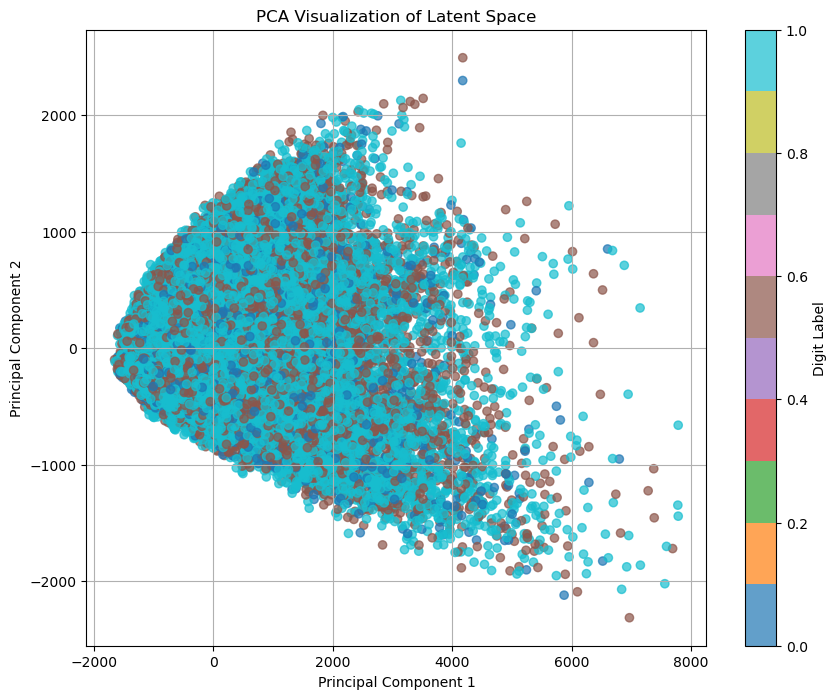

In [7]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA(n_components=2, kernel='poly')
latent_2d = pca.fit_transform(latent_space)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=train_y.argmax(axis=-1)/2, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("KernelPCA Visualization of Latent Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


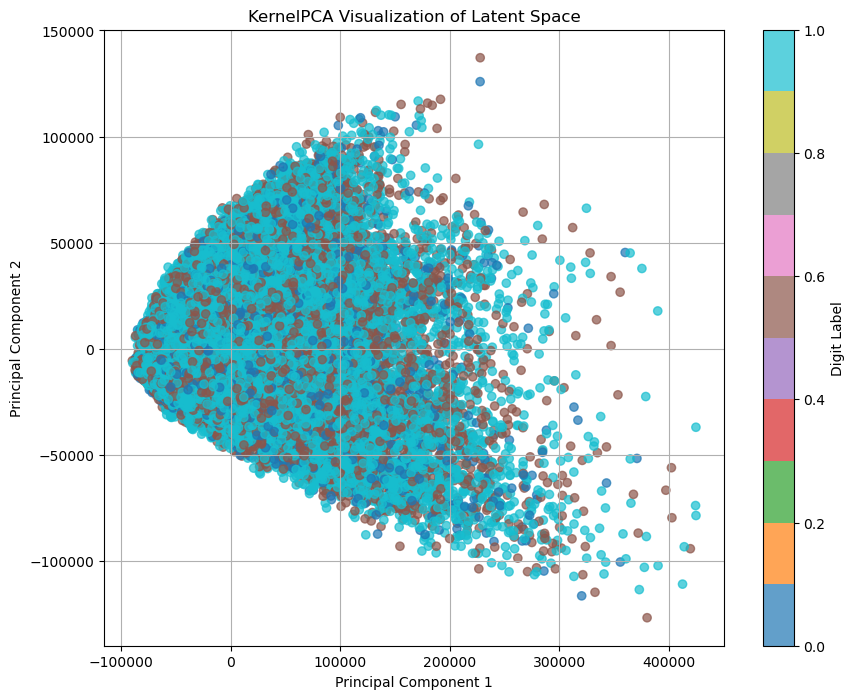

In [9]:
pca = KernelPCA(n_components=2, kernel='poly', gamma=0.9)
latent_2d = pca.fit_transform(latent_space)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=train_y.argmax(axis=-1)/2, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("KernelPCA Visualization of Latent Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


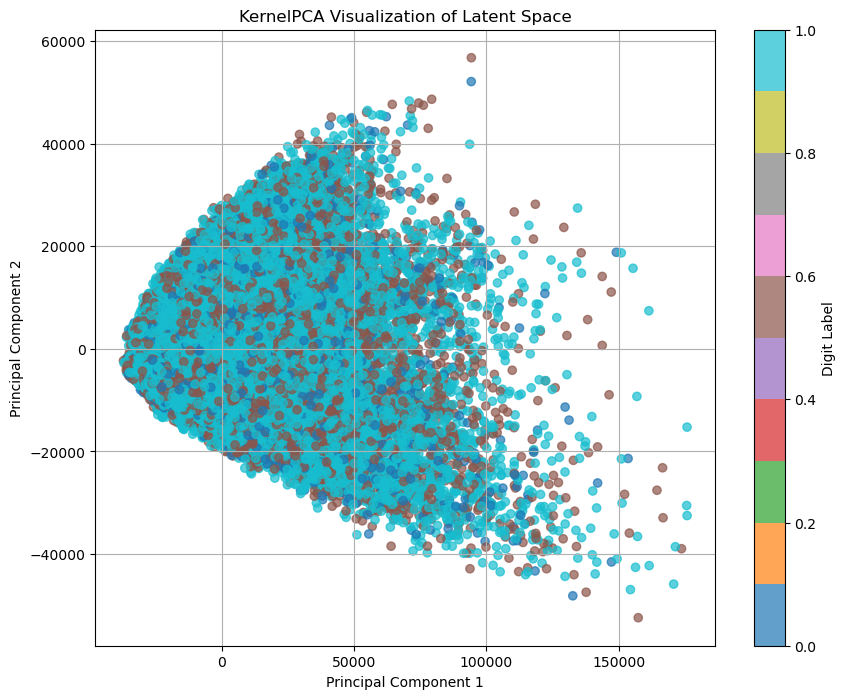

In [10]:
pca = KernelPCA(n_components=2, kernel='poly', gamma=0.5)
latent_2d = pca.fit_transform(latent_space)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=train_y.argmax(axis=-1)/2, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("KernelPCA Visualization of Latent Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


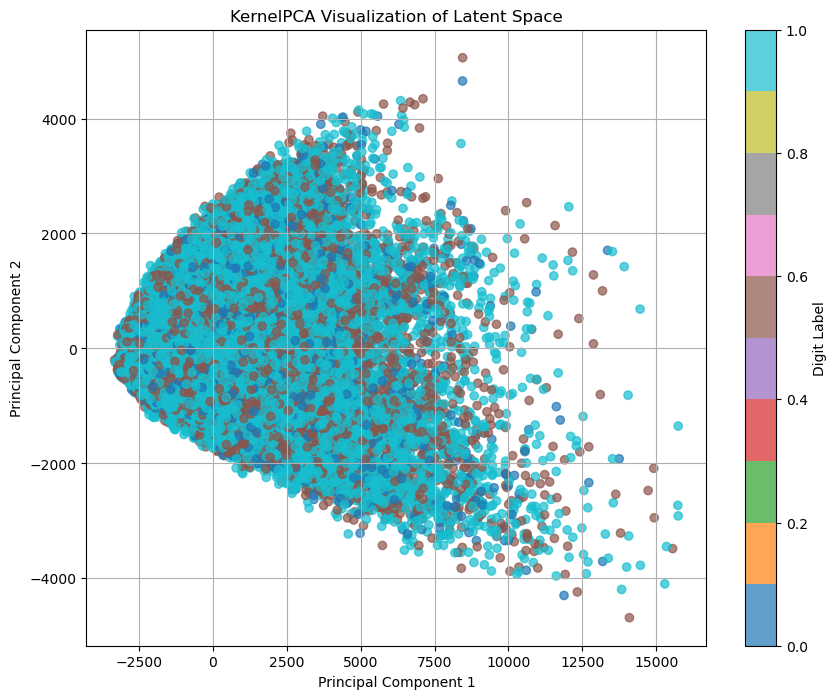

In [11]:
pca = KernelPCA(n_components=2, kernel='poly', gamma=0.1)
latent_2d = pca.fit_transform(latent_space)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=train_y.argmax(axis=-1)/2, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("KernelPCA Visualization of Latent Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


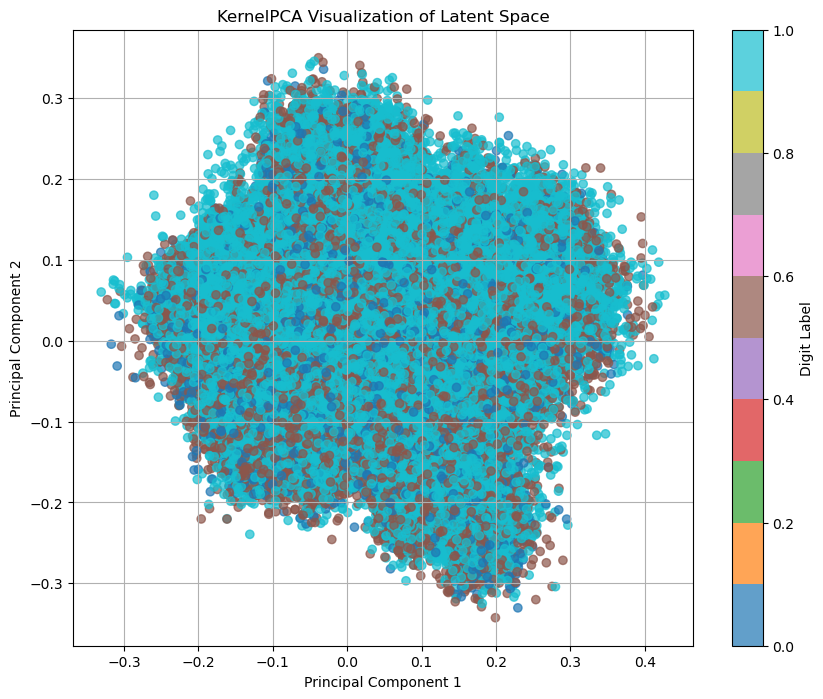

In [8]:
pca = KernelPCA(n_components=2, kernel='cosine')
latent_2d = pca.fit_transform(latent_space)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=train_y.argmax(axis=-1)/2, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("KernelPCA Visualization of Latent Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()
